BUILD A MODEL TO PREDICT PERFORMANCE OF EMPLOYEES,BASED ON THE VISUALISATION AND ANALYSIS OF PAST DATA OF EMPLOYEES PERFORMANCE.

Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import pandas as pd
import numpy as np

In [21]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

Read and Understand the data

In [22]:
Data = pd.read_csv("Test_data.csv")
Data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [23]:
Data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [24]:
Data.shape

(23490, 13)

In [25]:
Data.size

305370

In [26]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [27]:
Data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [28]:
Data.drop(columns=["employee_id"])

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [29]:
Data.drop(columns=["employee_id"])

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [32]:
Data.duplicated().sum()

0

In [34]:
Data = Data.drop_duplicates()

In [35]:
Data.duplicated().sum()

0

In [36]:
Data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

we have null values in two columns:

1.education = 1034
2. previous_year_rating = 1812

 1. education (Categorical, 1034 missing)
we can fill it with the mode (most frequent value).

In [37]:
Data['education'].fillna(Data['education'].mode()[0], inplace=True)

2.previous_year_rating(Numerical, 1812 missing)

In [38]:
Data['previous_year_rating'].fillna(Data['previous_year_rating'].median(), inplace=True)


VISUALISATION 

Count plots for categorical features

1. Department-wise Employee Count

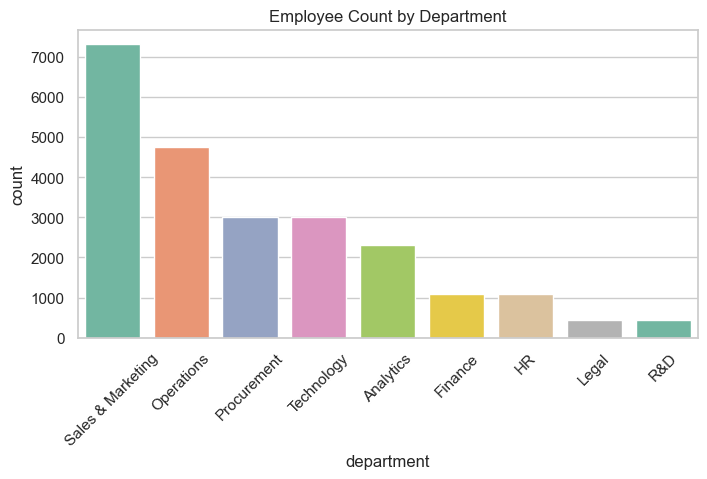

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(data= Data, x='department', order=Data['department'].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title("Employee Count by Department")
plt.show()

2. Region-wise Employee Distribution

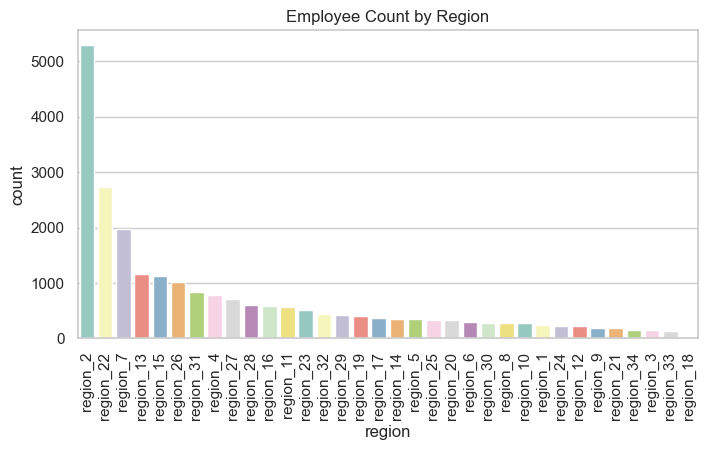

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(data=Data, x='region',order=Data['region'].value_counts().index, palette="Set3")
plt.xticks(rotation=90)
plt.title("Employee Count by Region")
plt.show()

3. Education Level Distribution

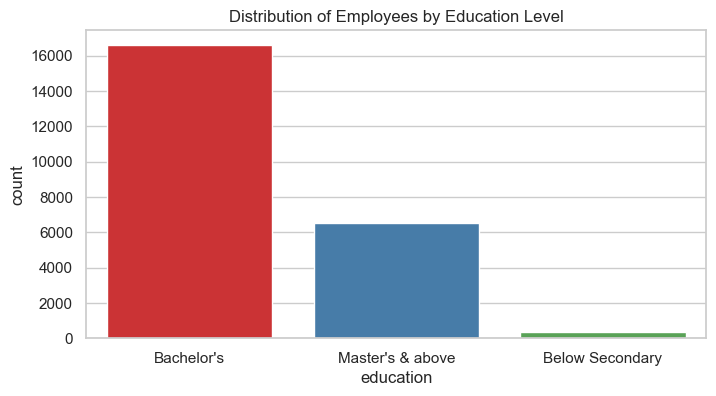

In [41]:
plt.figure(figsize=(8, 4))
sns.countplot(data=Data, x='education', palette="Set1")
plt.title("Distribution of Employees by Education Level")
plt.show()

4. Gender Distribution

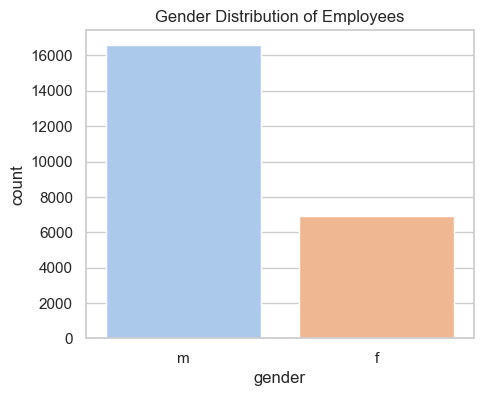

In [42]:
plt.figure(figsize=(5, 4))
sns.countplot(data= Data, x='gender', palette="pastel")
plt.title("Gender Distribution of Employees")
plt.show()

5. Recruitment Channel Distribution

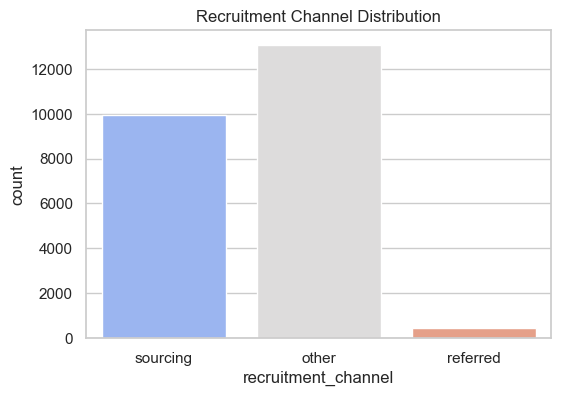

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=Data, x='recruitment_channel', palette="coolwarm")
plt.title("Recruitment Channel Distribution")
plt.show()

6. Previous Year Rating

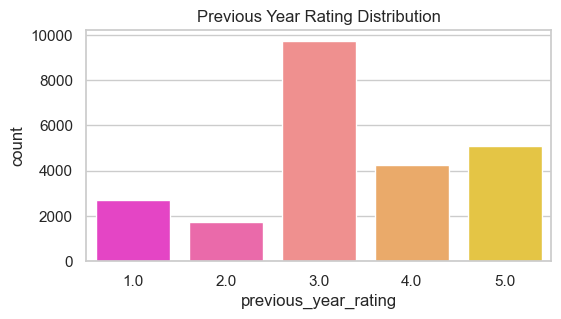

In [44]:
plt.figure(figsize=(6, 3))
sns.countplot(data=Data, x='previous_year_rating', palette="spring")
plt.title("Previous Year Rating Distribution")
plt.show()

7. Employees with KPI Met > 80%

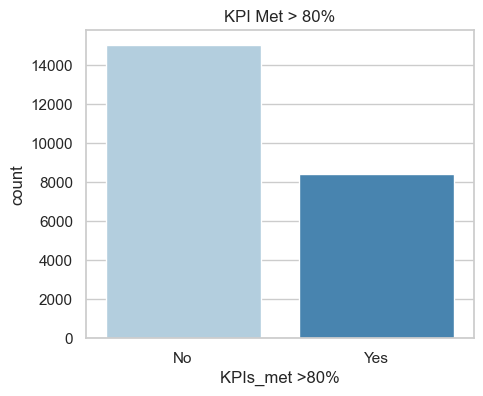

In [45]:
plt.figure(figsize=(5, 4))
sns.countplot(data=Data, x='KPIs_met >80%', palette="Blues")
plt.title("KPI Met > 80%")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

8. Awards Won

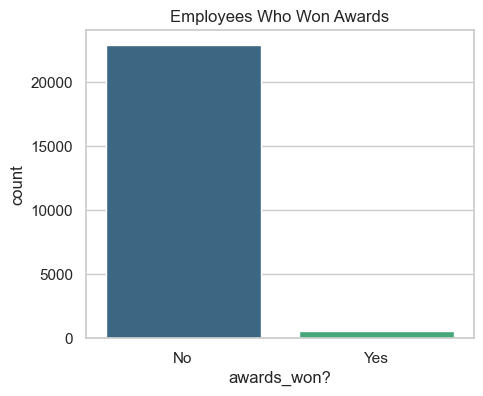

In [46]:
plt.figure(figsize=(5, 4))
sns.countplot(data=Data, x='awards_won?', palette="viridis")
plt.title("Employees Who Won Awards")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

Key insights from count plots

DEPARTMENT

 1.' Sales & Marketing' has the highest count, indicating that it is the largest department in terms of employee numbers in this dataset.
 2. The 'Operations' department follows as the second largest.
 3. 'Procurement' and 'Technology' have similar counts, suggesting they are smaller but comparably sized departments within the organization.
 4. 'Analytics', 'Finance', 'HR', 'R&D', and 'Legal' have progressively fewer employees, with 'Legal' being the smallest department.
 5. The visualization of 'Sales & Marketing' and 'Operations' suggests that these are likely core functions of the business, requiring the most    personnel.
 6. The smaller size of specialized departments like 'R&D' and 'Legal' is typical for many organizations, as these functions may not require as many staff as the more central operational roles.
 7. Departments such as 'Analytics' and 'Finance' may be support functions that require a moderate number of employees to function effectively across the organization.

REGION-WISE

1. The 'region_2' has the highest count of employees, suggesting that this region has the largest employee base within the organization.
2. The counts for other regions vary, with 'region_22', 'region_7', and 'region_15' having more employees than the rest but still significantly fewer than 'region_2'.
3. The remaining regions have progressively fewer employees, with some regions having very few employees in comparison to 'region_2'.
4. The organization may need to focus more HR resources and development programs in 'region_2', given its larger workforce.
5. The regions with fewer employees might be areas of potential expansion or may require different management strategies due to their smaller size.

EDUCATION

 1.Majority Employees have a Bachelor's Degree.
 2.Few have Master's & very few have Secondary education.

GENDER DISTRIBUTION

 1. There are significantly more male employees ('m') than female employees ('f') in this dataset.
 2. The count of male employees exceeds 14000, while the count of female employees is just over 8000.
 3. There is a notable gender imbalance in the workforce represented in TFI. This could reflect the hiring practices or the nature of the company.

RECRUITMENT CHANNEL DISTRIBUTION

 1. The 'other' category has the highest count, suggesting that many employees were recruited through channels that are not explicitly labeled as 'sourcing' or 'referred'.
 2. 'Sourcing' is the next most common recruitment channel, with just slightly fewer counts than 'other'.
 3. The 'referred' category has the lowest count among the three, indicating that fewer employees were hired through referrals compared to other methods.
 4. The organization uses a variety of recruitment channels, with a significant portion coming from unspecified sources ('other'). These could include  online job postings, career fairs, or direct applications to the company.

 PREVIOUS YEAR RATING

 1. Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
 2. The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
 3. Rating '4.0 ' is slightly less common than '5.0', but still represents a large number of employees.
 4. Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.
 5. The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
6. The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

EMPLOYEE_MET_KPI> 80%

 1. The number of employees who did not meet the KPI (indicated by '0') is higher than those who did (indicated by '1').
 2. There are over 14000 instances of employees not meeting the KPI and around 8000 instances where employees met the KPI.
 3. The company may need to explore why a large proportion of employees are not meeting the KPI and implement training or development programs to support them.
 4. The KPI set at 80% might be too high, and the company could consider evaluating the KPI thresholds to ensure they are realistic and achievable.

AWARDS WON

 1. A large majority of employees (indicated by the bar labeled '0') have not won any awards.
 2. A relatively small number of employees (indicated by the bar labeled '1') have won awards.
 3. Awards may be given out selectively for exceptional performance or achievements, hence only a small number of employees have received them.
 4. The criteria for winning awards within this organization might be stringent, making it an accomplishment that few achieve.

COUNT PLOTS FOR NUMERICAL FEATURES

NO_OF_TRAININGS

In [80]:
trainings_value_counts = Data['no_of_trainings'].value_counts()

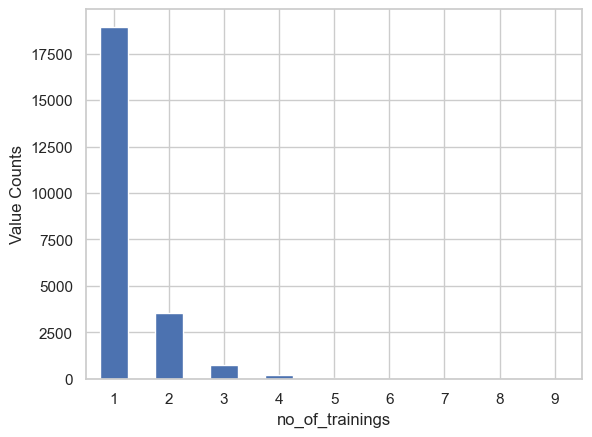

In [81]:
trainings_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

EMPLOYEE_LENGTH_OF_SERVICE

In [84]:
service_value_counts = Data['length_of_service'].value_counts()

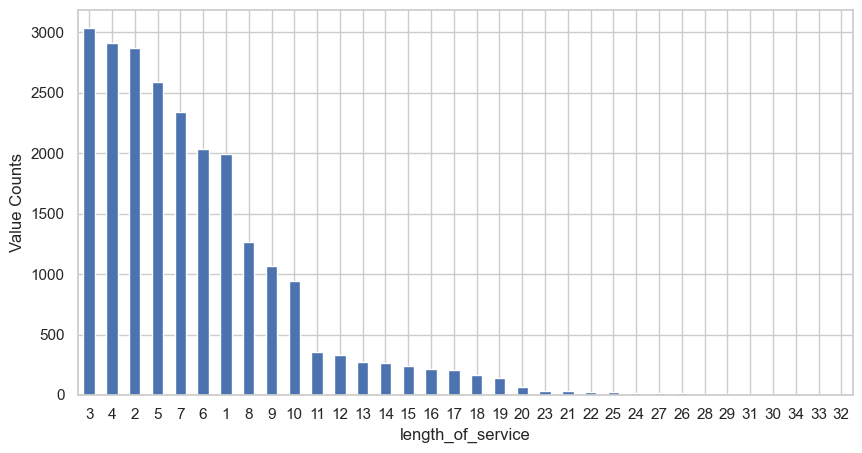

In [88]:
plt.figure(figsize=(10,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

EMPLOYEE_AVERAGGE_TRAINING_SCORE

In [89]:
average_training_score_counts = Data['avg_training_score'].value_counts()

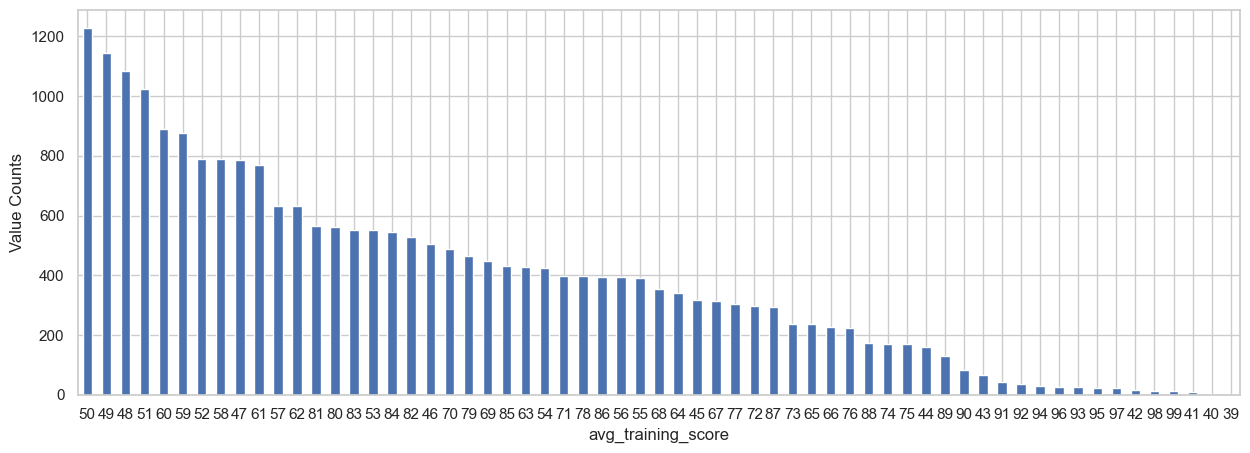

In [94]:
plt.figure(figsize=(15,5))
average_training_score_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

AGE

In [96]:
age_value_counts = Data['age'].value_counts()

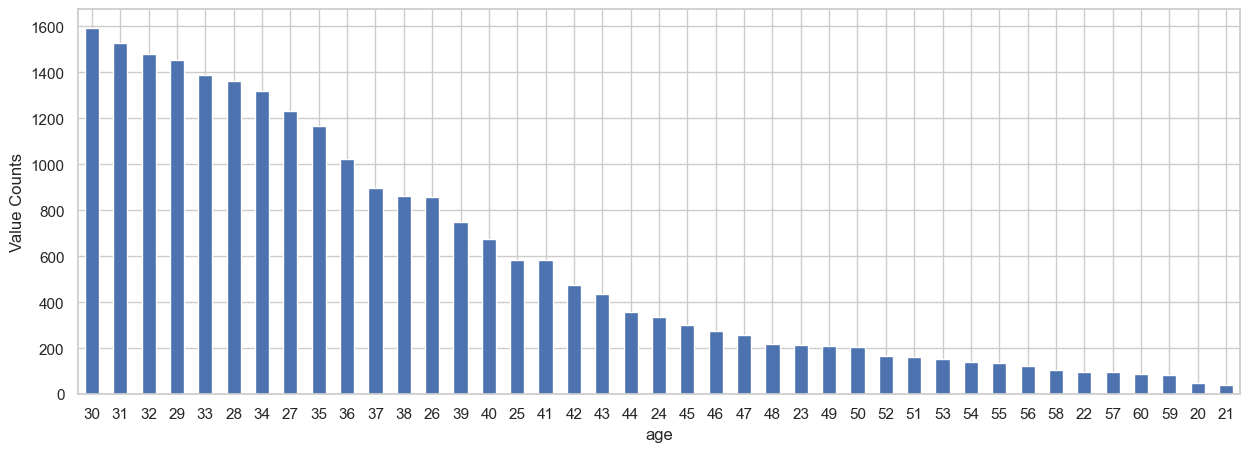

In [98]:
plt.figure(figsize=(15,5))
age_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

KEY INSIGHTS FROM ABOVE COUNTPLOTS

NO_OF_TRAININGS

 1. A vast majority of employees have attended only one training session, as evidenced by the first bar's height, which far exceeds that of the others.
 2. There is a steep decline in the number of employees who have attended two training sessions, and an even more pronounced drop for those who have  attended three.
 3. Very few employees have attended more than three training sessions, with the numbers becoming increasingly smaller for higher counts of training attendance.
 4. The organization might have a policy or culture that encourages or requires all employees to undergo at least one training session.

EMPLOYEE_LENGTH_OF_SERVICE

 1. There is a high number of employees with a short tenure, particularly those with 3 to 5 years of service.
 2. The number of employees decreases as the length of service increases, which is a common pattern in many organizations.
 3. There is a particularly sharp decrease after the first few years, indicating that either a lot of hiring has been done in recent years, or there is a high turnover rate within the first few years of service.
 4. Very few employees have extremely long tenures (over 20 years), which could suggest a relatively young organization, recent expansion, or few opportunities or incentives for long-term career development within the company.

AGE

 1. The workforce is predominantly in the younger age brackets, with the highest count of employees around the age of 30.
 2. The number of employees gradually decreases with increasing age. This is indicative of a typical age distribution in many organizations, where younger employees outnumber their older counterparts.
 3. There is a noticeable tapering off as age increases, with significantly fewer employees in the late 50s and early 60s.
 4. The chart suggests that the organization might have a relatively young workforce, which could be reflective of recent hiring trends, the nature of the industry, or the fact that employees may tend to move on or retire around a certain age.